In [66]:
!pip install statsmodels

---

https://www.kaggle.com/code/brookeallred/store-sales-competition-kbb
https://www.kaggle.com/code/gcdatkin/loan-payment-prediction-100-accuracy
https://aditya0072001-data-explorer-main-ni09x2.streamlit.app/


In [7]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
loan = pd.read_csv('./loandata/Loan payments data.csv')

In [15]:
display(loan.head(5))
display(loan.tail(5))


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
495,xqd20160496,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/14/2016 19:08,3.0,28,High School or Below,male
496,xqd20160497,COLLECTION_PAIDOFF,1000,15,9/12/2016,9/26/2016,10/10/2016 20:02,14.0,26,High School or Below,male
497,xqd20160498,COLLECTION_PAIDOFF,800,15,9/12/2016,9/26/2016,9/29/2016 11:49,3.0,30,college,male
498,xqd20160499,COLLECTION_PAIDOFF,1000,30,9/12/2016,11/10/2016,11/11/2016 22:40,1.0,38,college,female
499,xqd20160500,COLLECTION_PAIDOFF,1000,30,9/12/2016,10/11/2016,10/19/2016 11:58,8.0,28,High School or Below,male


- PAIDOFF: 付完
- COLLECTION: 尚未付
- COLLECTION_PAIDOFF: 超過時間但已經付完

In [16]:
# check the duplicate data in data set
loan.duplicated().sum()


0

In [20]:
loan.shape
loan.info()
loan.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [23]:
"""
From Analysis:

1. There are no duplicated values.
2. Loan data set have 500 records in 11 columns/features.
3. There are 100 null values in "paid_off_time" feature and 300 null values in "past_due_days"
4. Also we will need to convert some columns to respective datetime datatype
"""

'\nFrom Analysis:\n\n1. There are no duplicated values.\n2. Loan data set have 500 records in 11 columns/features.\n3. There are 100 null values in "paid_off_time" feature and 300 null values in "past_due_days"\n4. Also we will need to convert some columns to respective datetime datatype\n'

In [25]:
# convert columns to the Datetime format
loan['effective_date'] = pd.to_datetime(loan['effective_date'])
loan['due_date'] = pd.to_datetime(loan['due_date'])
loan['paid_off_time'] = pd.to_datetime(loan['paid_off_time']).dt.date
loan['paid_off_time'] = pd.to_datetime(loan['paid_off_time'])
loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Loan_ID         500 non-null    object        
 1   loan_status     500 non-null    object        
 2   Principal       500 non-null    int64         
 3   terms           500 non-null    int64         
 4   effective_date  500 non-null    datetime64[ns]
 5   due_date        500 non-null    datetime64[ns]
 6   paid_off_time   400 non-null    datetime64[ns]
 7   past_due_days   200 non-null    float64       
 8   age             500 non-null    int64         
 9   education       500 non-null    object        
 10  Gender          500 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(4)
memory usage: 43.1+ KB


In [26]:
# replace NaN values

array([[<AxesSubplot:title={'center':'Principal'}>,
        <AxesSubplot:title={'center':'terms'}>,
        <AxesSubplot:title={'center':'effective_date'}>],
       [<AxesSubplot:title={'center':'due_date'}>,
        <AxesSubplot:title={'center':'paid_off_time'}>,
        <AxesSubplot:title={'center':'past_due_days'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

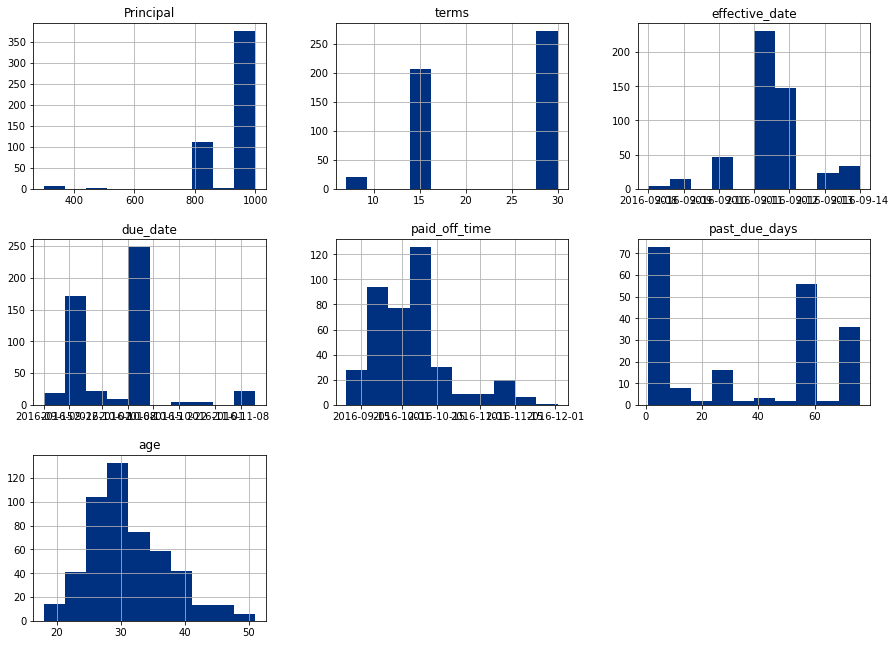

In [29]:
loan.hist(figsize = (15,11), color="#003080")


In [ ]:
loan['past_due_days'].fillna(loan['past_due_days'].mean(), inplace = True)  ## 準時付款的人不會有past_due_days
loan['paid_off_time'] = loan['paid_off_time'].fillna(-1) ## 未付款的(COLLECTION)的人, paid_off_time為空

In [44]:
# loan[loan['paid_off_time'].isna()]['loan_status'].value_counts() ## 未付款的(COLLECTION)的人, paid_off_time為空
# loan[loan['past_due_days'].isna()]['loan_status'].value_counts()

## Exploratory Data Analysis¶


### Loan Status Analysis

In [48]:
loan_stat = loan['loan_status'].value_counts()
pd.DataFrame(loan_stat)
# '''
# - PAIDOFF: 付完
# - COLLECTION: 尚未付
# - COLLECTION_PAIDOFF: 超過時間但已經付完
# '''

,loan_status
PAIDOFF,300
COLLECTION,100
COLLECTION_PAIDOFF,100


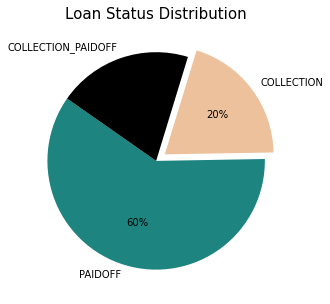

In [49]:
plt.figure(figsize = [10,5])
plt.pie(loan['loan_status'].value_counts(),labels=loan['loan_status'].unique(),explode=[0,0.1,0],startangle=145,autopct='%1.f%%', colors=['#1e847f', '#ecc19c', '#000000'])
plt.title('Loan Status Distribution',fontsize = 15)
plt.show()


We can see here,

- Out of 500 peoples 300 people repaid the full amount on time.
- Collection paid off shows 100 peoples repaid the loan but lately after due date.
- Collection shows 100 people not repaid the loan.

### Gender v/s Loan Status Analysis¶


In [50]:
loan['Gender'].value_counts().sort_index()


female     77
male      423
Name: Gender, dtype: int64

Out of 500 their are 423 males and 77 females present



In [51]:
loan.groupby(['Gender'])['loan_status'].value_counts().to_frame()


loan_status
Gender loan_status                    
female PAIDOFF                      53
       COLLECTION_PAIDOFF           14
       COLLECTION                   10
male   PAIDOFF                     247
       COLLECTION                   90
       COLLECTION_PAIDOFF           86

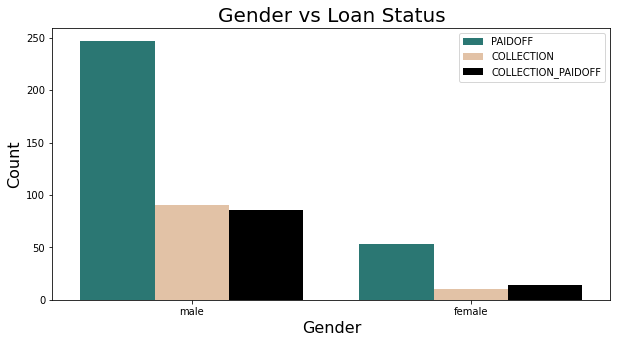

In [52]:
plt.figure(figsize = [10,5])
sns.countplot(loan['Gender'],hue=loan['loan_status'], palette=('#1e847f', '#ecc19c', '#000000'))
plt.legend(loc='upper right')
plt.title('Gender vs Loan Status',fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

From above analysis:

- Out of 500 their are 423 males and 77 females present
- Around 40% of male population have repaid their loan lately (or yet to pay)
- Around 30% of female population have repaid their loan lately (or yet to pay)
- Irrespective of gender, most of the population tend to pay the loan on time

### Education v/s Loan Status Analysis¶


In [54]:
loan['education'].value_counts().to_frame()


,education
college,220
High School or Below,209
Bechalor,67
Master or Above,4


In [55]:
loan.groupby(['education'])['loan_status'].value_counts().to_frame()


loan_status
education            loan_status                    
Bechalor             PAIDOFF                      41
                     COLLECTION_PAIDOFF           15
                     COLLECTION                   11
High School or Below PAIDOFF                     123
                     COLLECTION                   49
                     COLLECTION_PAIDOFF           37
Master or Above      PAIDOFF                       3
                     COLLECTION                    1
college              PAIDOFF                     133
                     COLLECTION_PAIDOFF           48
                     COLLECTION                   39

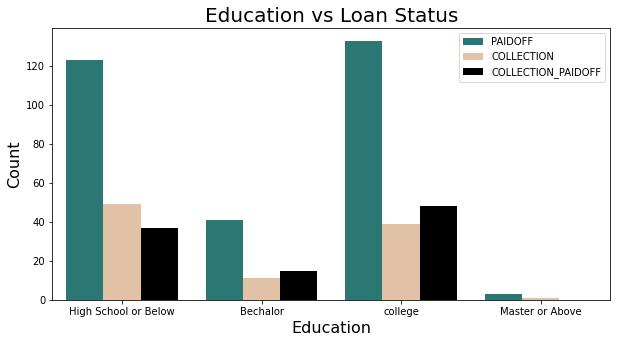

In [56]:
plt.figure(figsize = [10,5])
sns.countplot(loan['education'],hue=loan['loan_status'], palette=('#1e847f', '#ecc19c', '#000000'))
plt.legend(loc='upper right')
plt.title('Education vs Loan Status',fontsize=20)
plt.xlabel('Education', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

From above analysis:

- Majority of the loan takers are from High School or College background
- Very few people from Masters or Above background took loan.
- Irrespective of education category, most of them repaid their loan

### Age v/s Loan Status Analysis¶


In [57]:
loan['age'].value_counts().to_frame()


,age
26,46
29,42
27,38
30,37
28,32
33,30
35,26
34,25
24,23
31,22


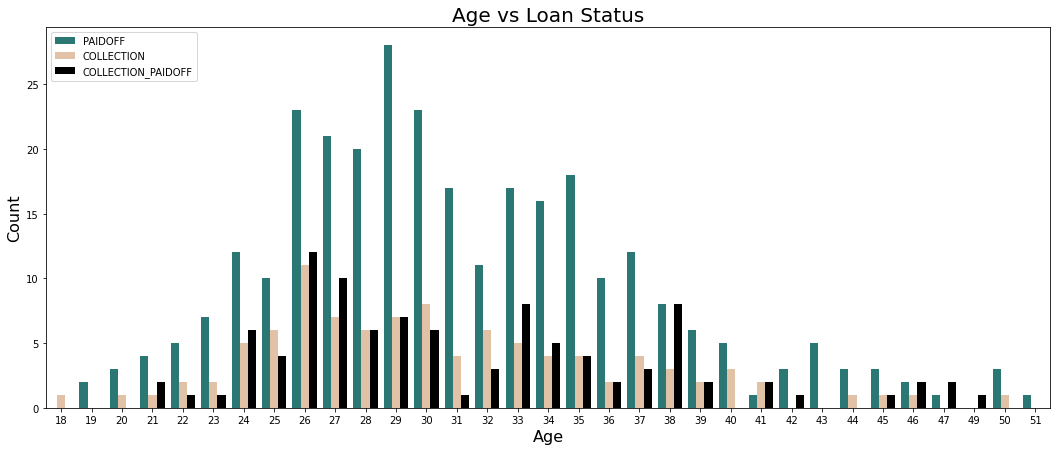

In [58]:
plt.figure(figsize = [18,7])
sns.countplot(loan['age'],hue=loan['loan_status'],palette=('#1e847f', '#ecc19c', '#000000'))
plt.legend(loc='upper left')
plt.title('Age vs Loan Status',fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

From above analysis:

- Majority of the people who took loan have age ranging from 24 years to 38 years
- Majority of people repaid their loan

### Principal v/s Loan Status Analysis¶


In [59]:
loan['Principal'].value_counts().to_frame()


,Principal
1000,377
800,111
300,6
500,3
900,2
700,1


In [60]:
loan.groupby(['Principal'])['loan_status'].value_counts().to_frame()


loan_status
Principal loan_status                    
300       PAIDOFF                       6
500       PAIDOFF                       2
          COLLECTION_PAIDOFF            1
700       PAIDOFF                       1
800       PAIDOFF                      69
          COLLECTION                   23
          COLLECTION_PAIDOFF           19
900       PAIDOFF                       2
1000      PAIDOFF                     220
          COLLECTION_PAIDOFF           80
          COLLECTION                   77

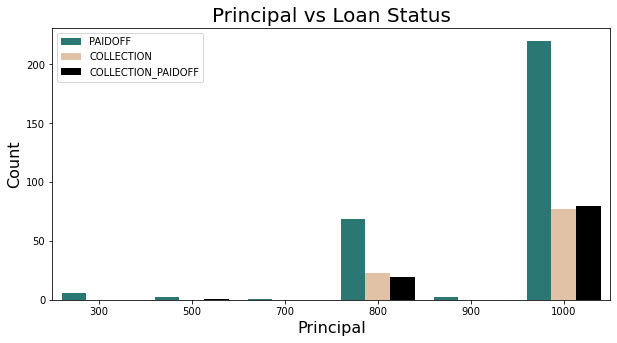

In [61]:
plt.figure(figsize = [10,5])
sns.countplot(loan['Principal'],hue=loan['loan_status'],palette=('#1e847f', '#ecc19c', '#000000'))
plt.legend(loc='upper left')
plt.title('Principal vs Loan Status',fontsize=20)
plt.xlabel('Principal', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

From above analysis:

- Majority of the people have opted for Principal of 800 and 1000
- And out of those 1800 people, majority of them repaid their loan

### Term v/s Loan Status Analysis¶


In [ ]:
loan['terms'].value_counts().to_frame()


In [62]:
loan.groupby(['terms'])['loan_status'].value_counts().to_frame()

loan_status
terms loan_status                    
7     PAIDOFF                      20
      COLLECTION_PAIDOFF            1
15    PAIDOFF                     127
      COLLECTION                   41
      COLLECTION_PAIDOFF           39
30    PAIDOFF                     153
      COLLECTION_PAIDOFF           60
      COLLECTION                   59

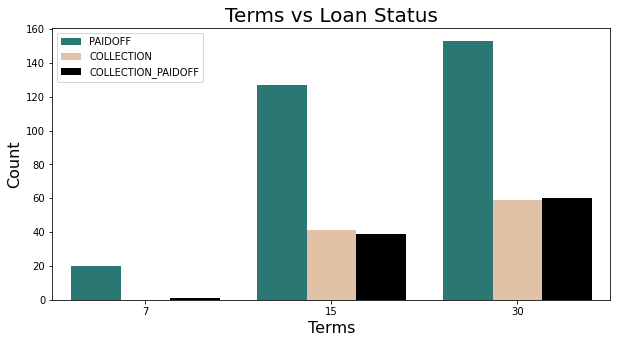

In [63]:
plt.figure(figsize = [10,5])
sns.countplot(loan['terms'],hue=loan['loan_status'],palette=('#1e847f', '#ecc19c', '#000000'))
plt.legend(loc='upper left')
plt.title('Terms vs Loan Status',fontsize=20)
plt.xlabel('Terms', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()